출처 : https://coding-yesung.tistory.com/207

# 로지스틱 회귀를 통한 승진 예측

In [1]:
!pip install sklearn
!pip install numpy
!pip install seaborn
!pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#데이터 불러오기
hr_df = pd.read_csv('./hr.csv')
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


시각화 5점

<Axes: xlabel='previous_year_rating', ylabel='is_promoted'>

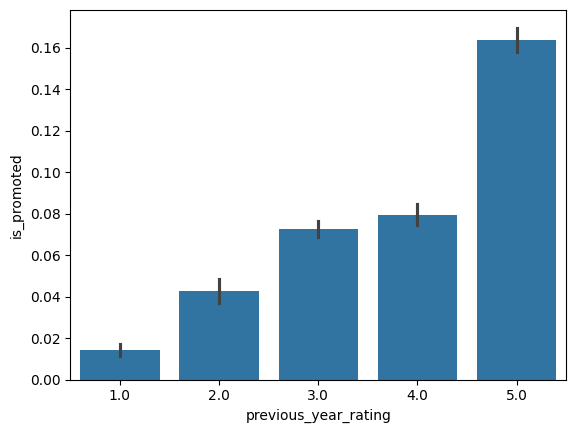

In [33]:
#작년 고과점수와 승진 확률에 대한 시각화
sns.barplot(x='previous_year_rating', y='is_promoted', data=hr_df)
#sns.barplot(x='previous_year_rating', y='''YOUR_CODE''', data=hr_df)

<Axes: xlabel='department', ylabel='is_promoted'>

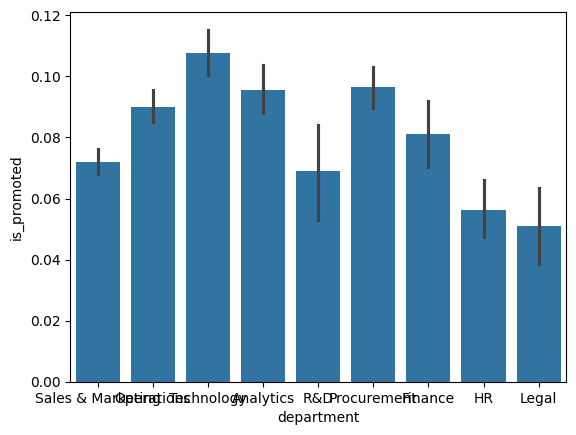

In [34]:
#부서에 따른 승진 확률 시각화
sns.barplot(x='department', y='is_promoted', data=hr_df)
#sns.barplot(x='''YOUR CODE''', y='is_promoted', data=hr_df)

매개변수 5점

In [91]:
#오류 발생 시 데이터 불러오기 과정 다시 실행

#원-핫 인코딩
hr_df = hr_df.dropna()
for i in ['department', 'region','education','gender','recruitment_channel']:
  print(i, hr_df[i].nunique())
hr_df = pd.get_dummies(hr_df, columns=['department', 'region','education','gender','recruitment_channel'])
hr_df.head()

from sklearn.model_selection import train_test_split
#학습 데이터와 검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(hr_df.drop('is_promoted', axis=1), hr_df['is_promoted'], test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

#규제는 l2, 규제강도는 1, 최대반복횟수는 200, 최적화 알고리즘은 solver를 사용
lr = LogisticRegression(penalty='l2', C=1, max_iter=200, solver='newton-cg')
#lr = LogisticRegression('''YOUR CODE''')

lr.fit(X_train, y_train)
pred = lr.predict(X_test)

department 9
region 34
education 3
gender 2
recruitment_channel 3


c:\Users\gudtj\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\gudtj\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\gudtj\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\gudtj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


f1 점수 3점

In [92]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print(confusion_matrix(y_test, pred))

# 정밀도
#precision_score('''YOUR CODE''')

# 재현율
#recall_score('''YOUR CODE'''))

# f1 score
#f1_score('''YOUR CODE''')

# 정밀도
precision_score(y_test, pred)

# 재현율
recall_score(y_test, pred)

# f1 score
f1_score(y_test, pred)



[[8852   13]
 [ 612  255]]


0.44933920704845814

번외(5점)

In [93]:
TempX = hr_df[['age', 'length_of_service']]
tempY = hr_df['is_promoted']

# 모델 객체 생성
temp_lr = LogisticRegression()

# 학습
temp_lr.fit(TempX, tempY)
#temp_lr.fit('''YOUR CODE''')

# 데이터프레임으로 보기
temp_df = pd.DataFrame({'age':[20, 27, 35],  'length_of_service':[1, 3, 7]})

# 학습에 대한 예측
pred = temp_lr.predict(temp_df)  

#age, length_of_service에 대한 기울기값
print(temp_lr.coef_)  
#print(temp_lr.???)  
# y절편값
print(temp_lr.intercept_)  
#print(temp_lr.???)  

#0과 1에 대한 확률 출력
#proba = temp_lr.predict_proba('''YOUR CODE''')
proba = temp_lr.predict_proba(temp_df)
proba

[[-0.01074458 -0.00053409]]
[-1.96818509]


array([[0.89876806, 0.10123194],
       [0.9055003 , 0.0944997 ],
       [0.91277384, 0.08722616]])